<a href="https://colab.research.google.com/github/mosabbeer/Machine_Learning/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

Data collection and precessing

In [13]:
#loading data
gold_data=pd.read_csv('/content/drive/MyDrive/gld_price_data.xls')

In [14]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
gold_data.describe() #statistical measure

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
gold_data.shape #number of row and column

(2290, 6)

In [17]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [18]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**Correaltion:**

1.Positive correlation
2.Negative correlation

In [21]:
correlation=gold_data.select_dtypes(include=['number']).corr()

<Axes: >

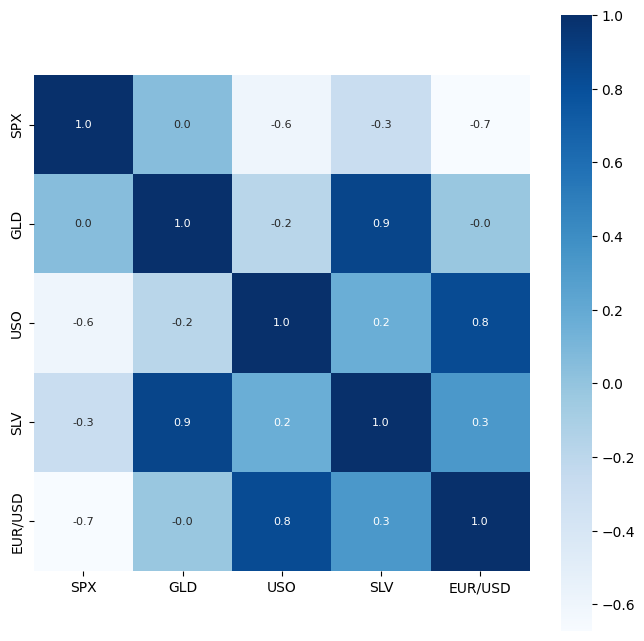

In [22]:
#creating a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [23]:
#correlatin values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-568878505.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

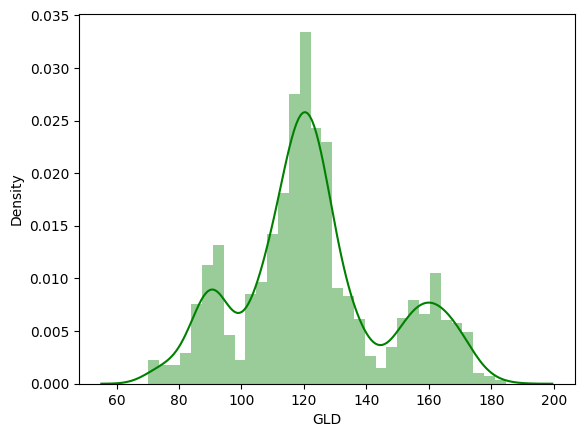

In [24]:
#checking the distribution of the price of gold
sns.distplot(gold_data['GLD'],color='green')

Splitting the feature and Terget

In [27]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [28]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [29]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [30]:
#spliting into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [33]:
print(y.shape,y_train.shape,y_test.shape)

(2290,) (1832,) (458,)


Model Training:

Random Forest Model Regressor

In [34]:
regressor=RandomForestRegressor(n_estimators=100)

In [35]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [36]:
#prediction on test data
test_data_prediction=regressor.predict(x_test)

In [37]:
print(test_data_prediction)

[168.59919881  82.52209968 116.34420059 127.70920094 120.86840114
 154.77039733 150.23659788 126.20329968 117.48219886 125.97620082
 116.60510149 171.73120131 141.35129855 167.85699839 115.24350003
 117.63940042 138.72920273 170.02000053 159.03750326 158.87629994
 155.14609991 124.88530032 176.16339975 156.9333043  125.22930066
  93.73759934  77.22310013 120.67930018 119.12739949 167.48000013
  88.26490075 125.25899958  91.27210073 117.7129005  121.02909917
 136.97280097 115.52020095 114.96890066 147.07950002 107.23900096
 104.22420245  87.1823978  126.34200074 117.86769987 152.68739918
 119.49990028 108.54509953 108.19109841  93.21200078 127.17919757
  75.46210022 113.64149916 121.16460025 111.2783993  118.81369883
 120.56749934 158.34040003 166.55060074 147.22929672  85.8571985
  94.47700032  86.74899893  90.65269991 118.95990079 126.39010041
 127.34720006 169.49819972 122.35649957 117.12639912  98.76800025
 167.89770142 142.93819772 131.57260214 121.22780194 120.86139956
 119.589000

In [38]:
#R square error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)


R squared error: 0.9888458107636255


Compare the precicted and actual values in plot

In [44]:
#checking the y_test datatype
type(y_test)


list

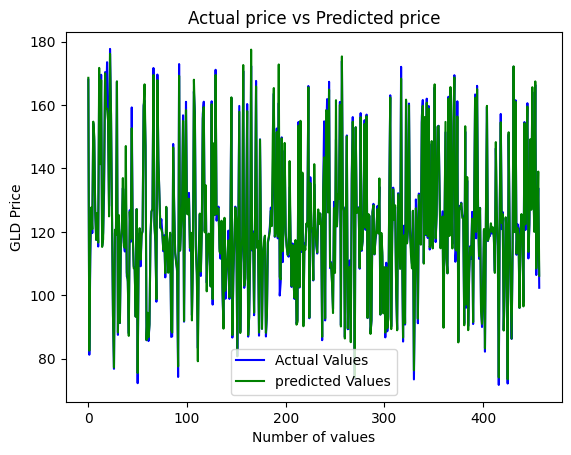

In [47]:
plt.plot(y_test,color='blue',label='Actual Values')
plt.plot(test_data_prediction,color='green',label='predicted Values')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()